# **VRV Security’s Python Intern Assignment**

> #### Log Analysis Script for Cybersecurity Tasks [CLICK](https://jobspecifications.notion.site/VRV-Security-s-Python-Intern-Assignment-150c14db06a9802b9763e50f7abed6b9 "Google")

## **Objective**

The goal of this assignment is to assess your ability to write a Python script that processes log files to extract and analyze key information. This assignment evaluates your proficiency in **`file handling`**, **`string manipulation`**, and **`data analysis`**, which are essential skills for `cybersecurity-related` programming tasks.

In [99]:
import csv
from collections import Counter

# File paths
log_file_path = r"C:\Users\vkr20\Documents\INNOMATICS_Main\VRV Assignment\Sample.NotePad.log"
output_csv = "log_analysis_result.csv"

# Convert log to CSV with Request Count
def log_to_csv_with_request_count(log_path, csv_path):
    with open(log_path, 'r') as log_file:
        logs = log_file.readlines()

    # Count requests per IP
    request_counts = Counter()
    failed_login_counts = Counter()

    for line in logs:
        parts = line.split()
        ip = parts[0]
        request_counts[ip] += 1

        # Identify failed login attempts (e.g., status code 401 or "Invalid credentials" in the line)
        if parts[8] == "401" or "Invalid credentials" in line:
            failed_login_counts[ip] += 1

    with open(csv_path, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write CSV header
        csv_writer.writerow(["IP Address", "Date/Time", "HTTP Method", "Endpoint", "Access Count", "Response Size", "Request Count", "Failed Login Count"])

        for line in logs:
            parts = line.split()
            ip = parts[0]
            datetime = parts[3].strip('[')
            method = parts[5].strip('"')
            endpoint = parts[6]
            access_count = parts[8]  # Fixed the typo from 'acess_count' to 'access_count'
            size = parts[9] if len(parts) > 9 else "0"
            request_count = request_counts[ip]
            failed_login_count = failed_login_counts[ip]

            # Write to CSV
            csv_writer.writerow([ip, datetime, method, endpoint, access_count, size, request_count, failed_login_count])

    print(f"Log file successfully converted to {csv_path} with Request Count and Failed Login Count")

# Convert the file
log_to_csv_with_request_count(log_file_path, output_csv)


Log file successfully converted to log_analysis_result.csv with Request Count and Failed Login Count


In [56]:
import pandas as pd
data = pd.read_csv(r"C:\Users\vkr20\Documents\INNOMATICS_Main\VRV Assignment\log_analysis_result.csv")

In [57]:
data.head()

,IP Address,Date/Time,HTTP Method,Endpoint,Access Count,Response Size,Request Count,Failed Login Count
0,192.168.1.1,03/Dec/2024:10:12:34,GET,/home,200,512,7,0
1,203.0.113.5,03/Dec/2024:10:12:35,POST,/login,401,128,8,8
2,10.0.0.2,03/Dec/2024:10:12:36,GET,/about,200,256,6,0
3,192.168.1.1,03/Dec/2024:10:12:37,GET,/contact,200,312,7,0
4,198.51.100.23,03/Dec/2024:10:12:38,POST,/register,200,128,8,0


In [58]:
data[["IP Address", "Endpoint", "Access Count", "Request Count", "Failed Login Count"]].head(3)

,IP Address,Endpoint,Access Count,Request Count,Failed Login Count
0,192.168.1.1,/home,200,7,0
1,203.0.113.5,/login,401,8,8
2,10.0.0.2,/about,200,6,0


# Data Overview
### 1. Before visualizing, get a summary of the dataset:
### 2. Display basic `statistics` and `information`



In [67]:
data.head()

,IP Address,Date/Time,HTTP Method,Endpoint,Access Count,Response Size,Request Count,Failed Login Count
0,192.168.1.1,03/Dec/2024:10:12:34,GET,/home,200,512,7,0
1,203.0.113.5,03/Dec/2024:10:12:35,POST,/login,401,128,8,8
2,10.0.0.2,03/Dec/2024:10:12:36,GET,/about,200,256,6,0
3,192.168.1.1,03/Dec/2024:10:12:37,GET,/contact,200,312,7,0
4,198.51.100.23,03/Dec/2024:10:12:38,POST,/register,200,128,8,0


In [68]:
data.describe()

,Access Count,Response Size,Request Count,Failed Login Count
count,34.000000,34.000000,34.000000,34.000000
mean,276.852941,336.705882,7.000000,2.617647
std,99.147314,288.527246,1.128152,3.499045
min,200.000000,128.000000,5.000000,0.000000
25%,200.000000,128.000000,6.000000,0.000000
50%,200.000000,192.000000,7.000000,0.000000
75%,401.000000,512.000000,8.000000,5.000000
max,401.000000,1024.000000,8.000000,8.000000


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   IP Address          34 non-null     object
 1   Date/Time           34 non-null     object
 2   HTTP Method         34 non-null     object
 3   Endpoint            34 non-null     object
 4   Access Count        34 non-null     int64 
 5   Response Size       34 non-null     int64 
 6   Request Count       34 non-null     int64 
 7   Failed Login Count  34 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.3+ KB


# **Core Requirements**

#### Your Python script should implement the following functionalities:

### 1. **Count Requests per IP Address**
> 1.1 Parse the provided log file to extract all **`IP addresses`**.
> 1.2  Calculate the number of requests made by each IP address

> 1.3 - Sort and display the results in descending order  request count.s.

In [21]:
data[["IP Address","Request Count"]].head(3)

,IP Address,Request Count
0,192.168.1.1,7
1,203.0.113.5,8
2,10.0.0.2,6



### 2. **Identify the Most Frequently Accessed Endpoint**
>2.1 Extract the endpoints (e.g., URLs or resource paths) from the log file.

>2.2 Identify the endpoint accessed the highest number of times.

>2.3 Provide the **`endpoint`** name and its **`access count`**

In [50]:
data[["Endpoint", "Access Count"]].head(3)

,Endpoint,Access Count
0,/home,200
1,/login,401
2,/about,200



### 3. **Detect Suspicious Activity**
> 3.1 Identify potential brute force login attempts by:

> 3.1.1 Searching for log entries with failed login attempts (e.g., HTTP status code `401` or a specific failure message like **"Invalid credentials"**)

> 3.1.2 Flagging `IP addresses` with `failed login` attempts exceeding a configurable threshold (**default**: 10 attempts).

>3.2 Display the flagged **`IP addresses`** and their **`failed login counts`**.

In [23]:
data[["IP Address", "Failed Login Count"]].head(3)

,IP Address,Failed Login Count
0,192.168.1.1,0
1,203.0.113.5,8
2,10.0.0.2,0


# **`Data Visualization` or `Exploratory Data Analysis` (EDA)**.

## Pandas
> Load and manipulate data with `pandas`
## matplotlib and seaborn
>Visualize the data with `matplotlib` and `seaborn`

In [97]:
### *The libraries work together to*:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Sample data
data = {
    "IP Address": ["192.168.1.1", "203.0.113.5", "10.0.0.2"],
    "AccessCount": [200,401,200],
    "Endpoint": ["/home", "/login", "/about"],
    "Request Count": [7,8,6],
    "Failed Login Count": [0,8,0]
}
df = pd.DataFrame(data)

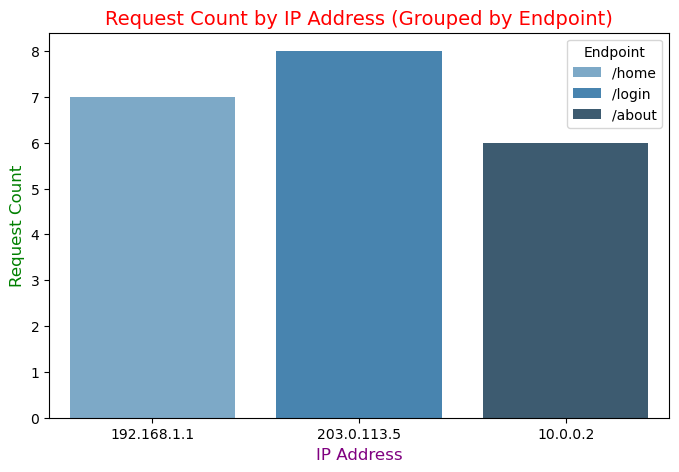

In [86]:
# Bar Chart: Request Count vs. IP Address (with hue)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="IP Address", y="Request Count", hue="Endpoint", palette="Blues_d")
plt.title("Request Count by IP Address (Grouped by Endpoint)",fontsize=14, color="red")
plt.ylabel("Request Count", fontsize=12, color="green")
plt.xlabel("IP Address", fontsize=12, color="purple")
plt.legend(title="Endpoint")
plt.show()


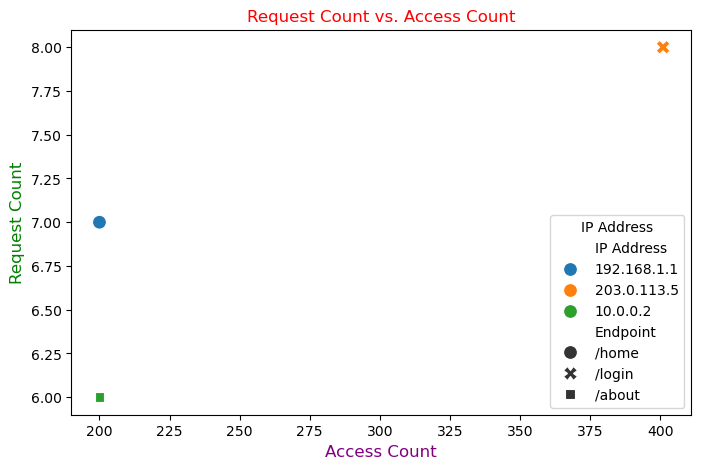

In [94]:
# 2. Scatter Plot: Request Count vs. Access Count
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="AccessCount", y="Request Count", hue="IP Address", style="Endpoint", s=100)
plt.title("Request Count vs. Access Count",fontsize=12, color="red")
plt.xlabel("Access Count", fontsize=12, color="purple")
plt.ylabel("Request Count",fontsize=12, color="green")
plt.legend(title="IP Address")
plt.show()


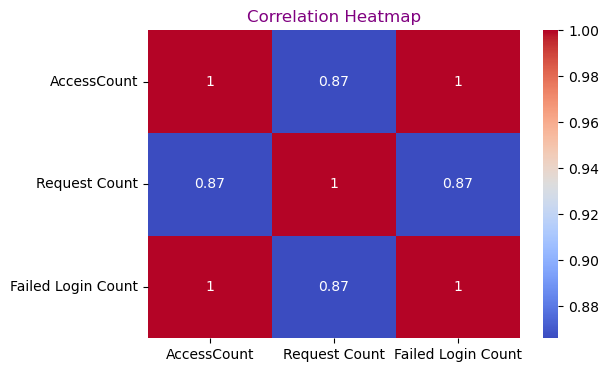

In [95]:
# 3. Heatmap: Correlation Matrix
plt.figure(figsize=(6, 4))
correlation_matrix = df[["AccessCount", "Request Count", "Failed Login Count"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=12, color="purple")
plt.show()


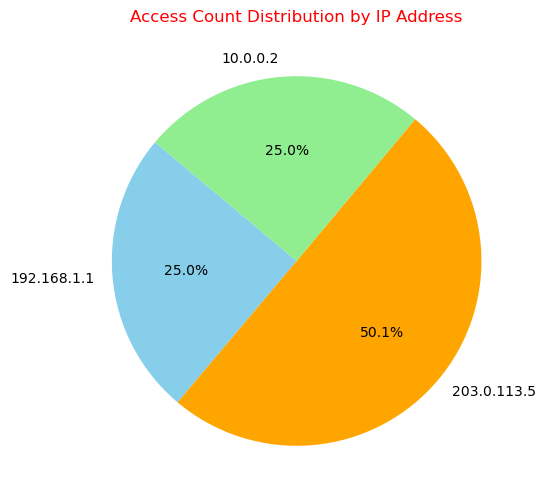

In [93]:
# 4. Pie Chart: Distribution of Access Count by IP Address
plt.figure(figsize=(6, 6))
plt.pie(
    df["AccessCount"],
    labels=df["IP Address"],
    autopct="%1.1f%%",
    startangle=140,
    colors=["skyblue", "orange", "lightgreen"],
)
plt.title("Access Count Distribution by IP Address",fontsize=12, color="red")
plt.show()
